In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train,y_train), (X_test,y_test) = keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_test.shape

(10000, 1)

In [5]:
y_train.shape

(50000, 1)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

X_train = X_train/255
X_test = X_test/255

In [8]:
cnn_model = keras.Sequential([
    
    keras.layers.Conv2D(input_shape = (32,32,3),filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax'),
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = "adam",
    metrics=["accuracy"]
)

cnn_model.fit(X_train,y_train,epochs= 10, batch_size = 8)

Epoch 1/10
6250/6250 [==============================] - 91s 14ms/step - loss: 1.5258 - accuracy: 0.4463
Epoch 2/10
6250/6250 [==============================] - 90s 14ms/step - loss: 1.2356 - accuracy: 0.5642
Epoch 3/10
6250/6250 [==============================] - 90s 14ms/step - loss: 1.1239 - accuracy: 0.6095
Epoch 4/10
6250/6250 [==============================] - 90s 14ms/step - loss: 1.0622 - accuracy: 0.6343
Epoch 5/10
6250/6250 [==============================] - 90s 14ms/step - loss: 1.0086 - accuracy: 0.6536
Epoch 6/10
6250/6250 [==============================] - 90s 14ms/step - loss: 0.9637 - accuracy: 0.6694
Epoch 7/10
6250/6250 [==============================] - 90s 14ms/step - loss: 0.9333 - accuracy: 0.6803
Epoch 8/10
6250/6250 [==============================] - 90s 14ms/step - loss: 0.8915 - accuracy: 0.6954
Epoch 9/10
6250/6250 [==============================] - 90s 14ms/step - loss: 0.8610 - accuracy: 0.7061
Epoch 10/10
6250/6250 [==============================] - 90s 14m

In [9]:
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9611 - accuracy: 0.6773


[0.9611403346061707, 0.677299976348877]

In [10]:
y_pred = cnn_model.predict(X_test)

313/313 [==============================] - 3s 9ms/step


In [11]:
y_classes = [np.argmax(i) for i in y_pred]

In [12]:
def make_predictions(index):
    plt.figure(figsize=(2,2));
    plt.imshow(X_test[index]);
    print(classes[y_classes[index]])

horse


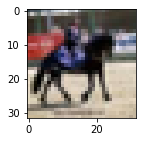

In [13]:
make_predictions(5000)

truck


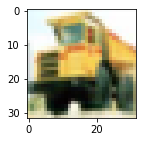

In [14]:
make_predictions(400)

ship


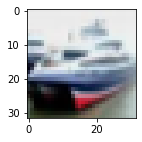

In [15]:
make_predictions(1)